# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [4]:
pth1_train = '/datasets/insurance.csv'
pth2_train = 'insurance.csv'

if os.path.exists(pth1_train):
    data = pd.read_csv(pth1_train)
elif os.path.exists(pth2_train):
    data = pd.read_csv(pth2_train)
else:
    print('Something is wrong 1')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
Не изменится

**Обоснование:** 
$$
a = X((X^TX)^{-1}X^T y)
$$

$$
X_1 = XN
$$

$$
𝑤_1 = ((XN)^T (XN))^{-1}(XN)^T y
$$

$$
w_1 = (N^TX^TXN)^{-1}(XN)^T y
$$

$$
w_1 =  (N^T)^{-1}(X^TX)^{-1}N^{-1}(XN)^T y\\(AA^{-1} = E -> (N^T)^{-1}N^T = E )
$$

$$
\\(w = (X^T X)^{-1} X^T y)
$$

$$
w_1 = N^{-1}w
$$

$$
a_1 = XN^{-1}Nw = Xw
$$

- Воспользовался этими формулами 
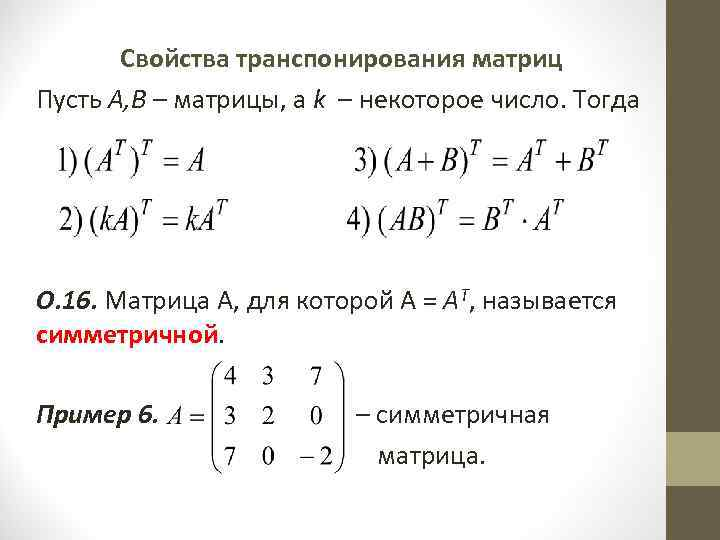
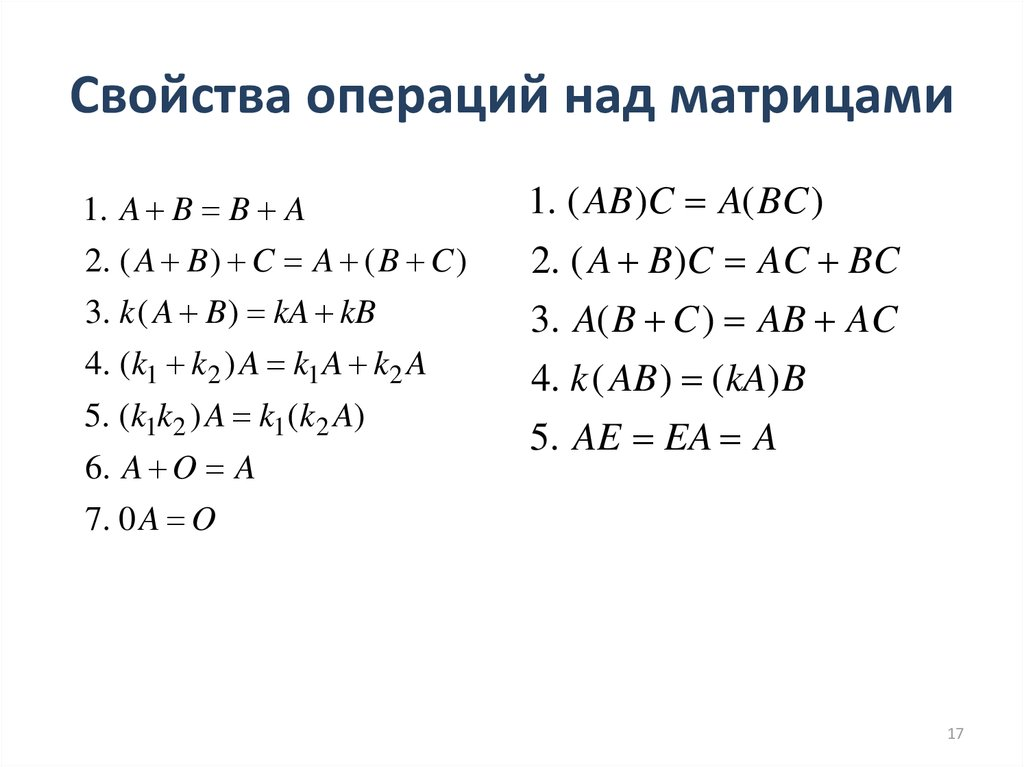

## Алгоритм преобразования

**Алгоритм**

-  создаем рендомную матрицу 4х4
-  создаем обратную ей матрицу
-  умнажаем матрицу признаков на сгенерированную обратную матрицу
-  проверим по метрике качества R2 исходную матрицу признаков и новую получившуюся матрицу

**Обоснование**

исходя из тождества 
$$
a_1 = XN^{-1}Nw = Xw = a
$$
можно сказать , что разница между R2 качеством предсказаний по матрице a и a1 отличаться не должны 

## Проверка алгоритма

In [6]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [7]:
matrix_random = np.random.normal(size=(4, 4))
matrix_random_revers = np.linalg.inv(matrix_random)
display(matrix_random_revers)

array([[-0.8482305 ,  2.35689659,  0.99759918, -1.00005623],
       [-1.0821317 ,  2.01527636,  0.15281899, -0.56402248],
       [-0.10809382,  5.87664877,  1.55070319, -3.64122702],
       [-0.81122768,  1.76539168,  0.22741475,  0.47460527]])

In [8]:
matrix_mult = np.dot(features.values , matrix_random_revers)


In [9]:
class LinearRagression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [10]:
model = LinearRagression()
model.fit(features, target)
prediction = model.predict(features)
r2_matrix_original = r2_score(target, prediction)

In [11]:
model = LinearRagression()
model.fit(features, target)
prediction = model.predict(features)
r2_matrix_revers = r2_score(target, prediction)

In [12]:
print(r2_matrix_original)
print(r2_matrix_revers)

0.42494550286668
0.42494550286668


- Очевидно что метрика качества R2 до и после преобразования матрицы не отличается